In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter
import random
from tqdm import tqdm
import time
import pickle
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
!pip install biopython==1.79

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.9 MB/s eta 0:00:00


## GET MOTIF SEQUENCES

In [ ]:
shuffled = pd.read_pickle('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/shuffled_1000.pkl')
shuffled.loc[:, 'n_tss'] = shuffled['index_tss'].apply(len)

In [ ]:
with open('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/shuffled_processed.pkl', 'rb') as f:
    data = pickle.load(f)
    positions, z_scores, raw_values, dataindex = data['positions'], data['z_scores'], data['raw_values'], data['dataindex']

In [ ]:
def get_top5(shuffled_input, full_z, real_index, percentile):
  z_scores_groups = np.abs(full_z.reshape(-1, 5))
  limit = np.percentile(np.abs(full_z), 100-percentile)
  print('limit corresponding to', 100-percentile, ':', limit)

  abs_z = np.abs(z_scores_groups)
  above_limit = np.sum(abs_z >= limit, axis=1)
  print('above_limit', above_limit.shape, above_limit)

  # get replicate index 0-200000
  selected_group = np.nonzero(above_limit)[0]
  print('selected_groups', selected_group)
  # get rows of selected replicates
  selected_row = abs_z[selected_group]
  print('selected_rows', selected_row)
  count_condition_met = np.sum( selected_row >= limit, axis=1)
  rows_with_condition_met = np.where(count_condition_met >= 3)[0]
  print('condition met', rows_with_condition_met)
  selected_row = selected_row[rows_with_condition_met]
  print('selected condition rows', selected_row)

  # take only max replicate - index of specific sample in replicate group
  selected_row = np.argmax(selected_row, axis=1)
  print('selected row max', selected_row)
  print(selected_group.shape, selected_row.shape)

  original_index = []
  for ind_sample in range(len(selected_row)):
    x, y = selected_group[ind_sample], selected_row[ind_sample]
    x = x*5 + y
    original_index.append(dataindex[x])

  relevant = shuffled_input.iloc[original_index]
  print(relevant.shape)
  relevant = relevant[['chr', 'strand', 'n_tss', 'seq_id', 'shuffle_position']].drop_duplicates().index
  print(relevant.shape)
  relevant = shuffled.iloc[relevant]
  print(relevant.shape)
  return relevant

important_motifs = get_top5(shuffled, raw_values['normalized'], dataindex, 10)
important_motifs

limit corresponding to 90 : 0.0006053104123566299
above_limit (200000,) [2 1 0 ... 0 0 0]
selected_groups [     0      1      3 ... 199951 199975 199986]
selected_rows [[3.3713560e-04 8.5902947e-04 2.2377475e-04 7.3725008e-04 2.9881459e-04]
 [7.3123066e-04 6.0049025e-04 3.8840549e-04 3.3175448e-04 9.8794400e-05]
 [5.1587808e-04 5.2522385e-04 9.0060255e-04 5.0407858e-04 1.8339889e-04]
 ...
 [2.2072338e-02 6.5392189e-02 7.2156124e-02 4.3831438e-02 3.2871470e-02]
 [1.5849778e-01 9.2256524e-02 2.0451790e-01 1.6581890e-01 1.5267016e-01]
 [1.7219083e-02 8.6322479e-02 4.9731480e-03 1.1996139e-02 3.3437997e-02]]
condition met [    3     6     7 ... 32294 32295 32296]
selected condition rows [[0.00073366 0.00064234 0.00094031 0.0005156  0.00086645]
 [0.00132479 0.00127215 0.00127048 0.00135306 0.00101168]
 [0.0012307  0.00120027 0.00081344 0.00106359 0.0015293 ]
 ...
 [0.02207234 0.06539219 0.07215612 0.04383144 0.03287147]
 [0.15849778 0.09225652 0.2045179  0.1658189  0.15267016]
 [0.01721908 

,chr,strand,index_tss,cut_from,cut_to,seq_id,motif_size,shuffle_position,replicate,seq_shuf,cut_from_to,cut_to_from,n_tss
2,3,+,[19],16370432,16485120,2679,10,445,2,CCATTCAAAAGCTCTTTAAAAACAATTGGTAAAACTACCAATAAAT...,16425776,16427776,1
8,3,+,[19],16370432,16485120,2679,10,797,3,CCATTCAAAAGCTCTTTAAAAACAATTGGTAAAACTACCAATAAAT...,16425776,16427776,1
19,3,+,[19],16370432,16485120,2679,10,1227,4,CCATTCAAAAGCTCTTTAAAAACAATTGGTAAAACTACCAATAAAT...,16425776,16427776,1
25,3,+,[19],16370432,16485120,2679,10,1692,0,CCATTCAAAAGCTCTTTAAAAACAATTGGTAAAACTACCAATAAAT...,16425776,16427776,1
35,3,+,[19],16370432,16485120,2679,10,448,0,CCATTCAAAAGCTCTTTAAAAACAATTGGTAAAACTACCAATAAAT...,16425776,16427776,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758063,3,+,[23],20679296,20793984,3532,10,1944,3,CACACTTGACCTTACCTTTTTGTTTCTCGTGTCTCTCTGACTTTTC...,20734640,20736640,1
758188,3,+,[23],20679296,20793984,3532,10,1959,3,CACACTTGACCTTACCTTTTTGTTTCTCGTGTCTCTCTGACTTTTC...,20734640,20736640,1
758287,3,+,[23],20679296,20793984,3532,20,1209,2,CACACTTGACCTTACCTTTTTGTTTCTCGTGTCTCTCTGACTTTTC...,20734640,20736640,1
758437,3,+,[23],20679296,20793984,3532,20,1937,2,CACACTTGACCTTACCTTTTTGTTTCTCGTGTCTCTCTGACTTTTC...,20734640,20736640,1


In [ ]:
important_motifs.cut_from.unique().shape

(329,)

In [ ]:
def get_sequences(important_motifs, motif_size_limit):
  seqs = pd.read_pickle('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/athal_seqs.pkl')
  results = {'+':[], '-':[]}
  for strand in ['+', '-']:
    for sample_start in tqdm(important_motifs.cut_from.unique()):
      for shuffle_positon in important_motifs[important_motifs.cut_from == sample_start].shuffle_position.unique():
        relevant = important_motifs[(important_motifs.cut_from == sample_start) & (important_motifs.shuffle_position == shuffle_positon) & \
                                    (important_motifs.strand == strand) & (important_motifs.motif_size <= motif_size_limit)]
        for row in relevant.index:
          data = important_motifs.loc[row]
          relevant_seq = seqs[f'{data.strand}{data.chr}'][data.cut_from:data.cut_to]
          assert len(relevant_seq) == 896*128
          relevant_seq = relevant_seq[448*128-2000:448*128]
          assert len(relevant_seq) == 2000

          relevant_seq = relevant_seq[data.shuffle_position:data.shuffle_position+data.motif_size]

          results[strand].append([data.cut_from+448*128-data.shuffle_position,
                                  data.cut_from+448*128-data.shuffle_position+data.motif_size,
                                  str(relevant_seq)])  # from, to, string
  return results

motifs = get_sequences(important_motifs, 20)

100%|██████████| 329/329 [00:57<00:00,  5.74it/s]


In [ ]:
with open('motifs10.fasta', 'w') as f:
  for strand in motifs:
    for data in motifs[strand]:
      if len(data[-1]) != 10:
        # print('skip', id)
        continue
      f.write(f'>Athaliana_chr3_{strand}_{data[0]}_{data[1]}\n')
      f.write(data[2]+'\n')

with open('motifs20.fasta', 'w') as f:
  for strand in motifs:
    for data in motifs[strand]:
      if len(data[-1]) != 20:
        # print('skip', id)
        continue
      f.write(f'>Athaliana_chr3_{strand}_{data[0]}_{data[1]}\n')
      f.write(data[2]+'\n')

## TOMTOM

### Result statistic

In [ ]:
def describe(output10, output20):
  print('10 = ', output10, '20 = ', output20)
  aligns10 = pd.read_csv(output10, sep='\t', comment='#')
  aligns20 = pd.read_csv(output20, sep='\t', comment='#')
  print('N core-queries', aligns10.Query_ID.unique().shape,
        'N tfbs-queries', aligns20.Query_ID.unique().shape)

  print('avg core q', aligns10['q-value'].mean(), 'avg tfbs q', aligns20['q-value'].mean())

  byq10 = aligns10[aligns10['q-value'] < 0.05]
  byq20 = aligns20[aligns20['q-value'] < 0.05]

  print('byqcore.shape, byqtfbs.shape', byq10.shape, byq20.shape)
  # pokritost query baze (od modela)
  print('Share of core-queries with q<0.05', byq10.Query_ID.unique().shape[0]/aligns10.Query_ID.unique().shape[0],
        'Share of tfbs-queries with q<0.05', byq20.Query_ID.unique().shape[0]/aligns20.Query_ID.unique().shape[0])

  print('Share of core-targets with q<0.05', byq10.Target_ID.unique().shape[0]/aligns10.Target_ID.unique().shape[0],
        'Share of tfbs-targets with q<0.05', byq20.Target_ID.unique().shape[0]/aligns20.Target_ID.unique().shape[0])


  min_indices10 = aligns10.groupby('Query_ID')['p-value'].idxmin()
  min_indices20 = aligns20.groupby('Query_ID')['p-value'].idxmin()

  # Select the rows with the minimum p-value for each group
  rows_with_min_p_values10 = aligns10.loc[min_indices10]
  rows_with_min_p_values20 = aligns20.loc[min_indices20]

  fig = plt.figure(figsize=(4, 3))
  rows_with_min_p_values10['p-value'].hist(grid=False, color='lightcoral',  alpha=0.5, label='core')
  rows_with_min_p_values20['p-value'].hist(grid=False, color='steelblue', alpha=0.5, label='tfbs')
  plt.xlabel('P-value')
  plt.ylabel('Count')
  plt.xlim(0, 1)
  plt.legend()
  plt.show()

  min_indices10 = aligns10.groupby('Query_ID')['q-value'].idxmin()
  min_indices20 = aligns20.groupby('Query_ID')['q-value'].idxmin()

  # Select the rows with the minimum p-value for each group
  rows_with_min_q_values10 = aligns10.loc[min_indices10]
  rows_with_min_q_values20 = aligns20.loc[min_indices20]

  fig = plt.figure(figsize=(4, 3))
  rows_with_min_q_values10['q-value'].hist(bins=100, grid=False, color='lightcoral',  alpha=0.5, label='core')
  rows_with_min_q_values20['q-value'].hist(bins=100, grid=False, color='steelblue',  alpha=0.5, label='tfbs')
  plt.xlabel('Q-value')
  plt.ylabel('Count')
  plt.legend()
  plt.show()

10 =  /content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtom50pct_core10.tsv 20 =  /content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtom50pct_tfbs10.tsv
N core-queries (24702,) N tfbs-queries (24262,)
avg core q 0.7820182943177072 avg tfbs q 0.475743940913111
byqcore.shape, byqtfbs.shape (2021, 10) (9667, 10)
Share of core-queries with q<0.05 0.07578333738158853 Share of tfbs-queries with q<0.05 0.06879070150853187
Share of core-targets with q<0.05 1.0 Share of tfbs-targets with q<0.05 0.9785604900459418


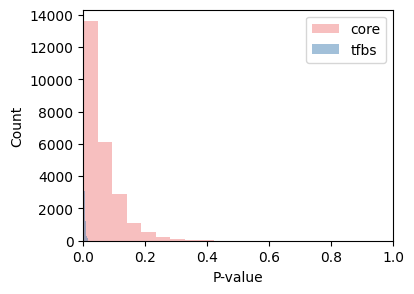

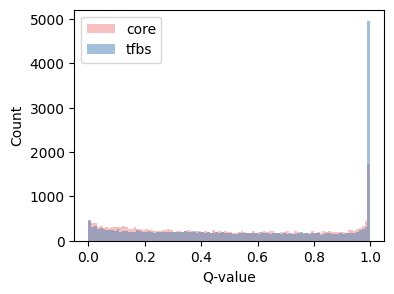

In [ ]:
describe('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtom50pct_core10.tsv', '/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtom50pct_tfbs10.tsv')

10 =  /content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomcore10_3.tsv 20 =  /content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomtfbs10_3.tsv
N core-queries (3833,) N tfbs-queries (3772,)
avg core q 0.788630406072662 avg tfbs q 0.4749067902307595
byqcore.shape, byqtfbs.shape (331, 10) (1510, 10)
Share of core-queries with q<0.05 0.07983302895903992 Share of tfbs-queries with q<0.05 0.07237539766702014
Share of core-targets with q<0.05 1.0 Share of tfbs-targets with q<0.05 0.7274119448698315


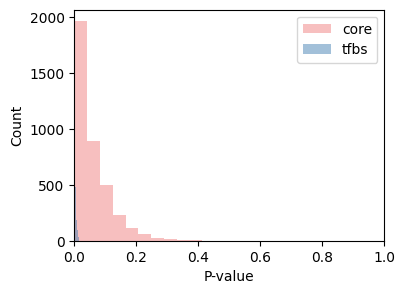

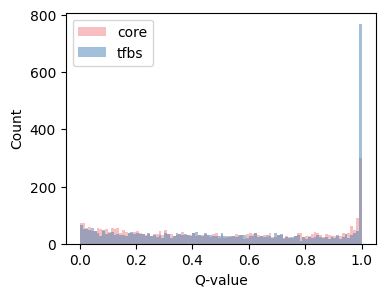

In [ ]:
describe('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomcore10_3.tsv', '/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomtfbs10_3.tsv')

10 =  /content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomcore20_3.tsv 20 =  /content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomtfbs20_3.tsv
N core-queries (4483,) N tfbs-queries (4451,)
avg core q 0.780939245358467 avg tfbs q 0.4346245609040985
byqcore.shape, byqtfbs.shape (322, 10) (2334, 10)
Share of core-queries with q<0.05 0.06803479812625474 Share of tfbs-queries with q<0.05 0.11660301055942485
Share of core-targets with q<0.05 0.8666666666666667 Share of tfbs-targets with q<0.05 0.6983154670750383


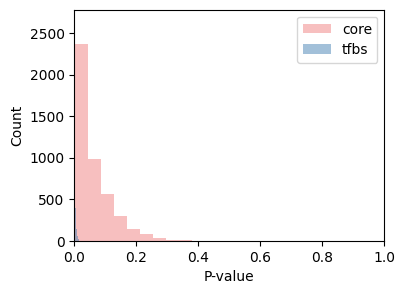

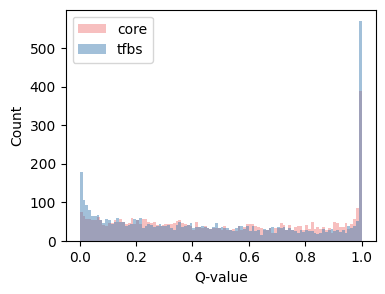

In [ ]:
describe('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomcore20_3.tsv', '/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomtfbs20_3.tsv')

### Query hit statistic

In [ ]:
def process(db, output10, output20):
  dbnames = []
  with open(db, 'r') as f:
    content = f.read().split('\n')
    for l in content:
      if 'MOTIF' in l: dbnames.append(l.strip().split(' ')[1:])
  dbsize = len(dbnames)

  aligns10 = pd.read_csv(output10, sep='\t', comment='#')
  aligns20 = pd.read_csv(output20, sep='\t', comment='#')
  print('N 10-queries', aligns10.Query_ID.unique().shape,
        'N 20-queries', aligns20.Query_ID.unique().shape)
  print('db size', dbsize)

  byq10 = aligns10[aligns10['q-value'] < 0.05]
  byq20 = aligns20[aligns20['q-value'] < 0.05]

  print('byq10.shape, byq20.shape', byq10.shape, byq20.shape)
  # pokritost query baze (od modela)
  print('Share of 10-queries with q<0.05', byq10.Query_ID.unique().shape[0]/aligns10.Query_ID.unique().shape[0],
        'Share of 20-queries with q<0.05', byq20.Query_ID.unique().shape[0]/aligns20.Query_ID.unique().shape[0])

  print('Share of 10-targets with q<0.05', byq10.Target_ID.unique().shape[0]/aligns10.Target_ID.unique().shape[0],
        'Share of 20-targets with q<0.05', byq20.Target_ID.unique().shape[0]/aligns20.Target_ID.unique().shape[0])

  missed_db_names10, missed_db_names20 = [], []
  for dbn in dbnames:
    isin10, isin20 = False, False
    for aln in byq10.Target_ID.values:
      if dbn[0] == aln:
        isin10=True
        break
    for aln in byq20.Target_ID.values:
      if dbn[0] == aln:
        isin20=True
        break
    if not isin10: missed_db_names10.append(dbn)
    if not isin20: missed_db_names20.append(dbn)

  print('missed in 10-queries', len(missed_db_names10),
        'missed in 20-queries', len(missed_db_names20))

  min_indices10 = aligns10.groupby('Query_ID')['p-value'].idxmin()
  min_indices20 = aligns20.groupby('Query_ID')['p-value'].idxmin()

  # Select the rows with the minimum p-value for each group
  rows_with_min_p_values10 = aligns10.loc[min_indices10]
  rows_with_min_p_values20 = aligns20.loc[min_indices20]

  fig = plt.figure(figsize=(4, 3))
  rows_with_min_p_values10['p-value'].hist(grid=False, color='lightcoral',  alpha=0.5, label='10')
  rows_with_min_p_values20['p-value'].hist(grid=False, color='steelblue', alpha=0.5, label='20')
  plt.xlabel('P-value')
  plt.ylabel('Count')
  plt.xlim(0, 1)
  plt.legend()
  plt.show()

  min_indices10 = aligns10.groupby('Query_ID')['q-value'].idxmin()
  min_indices20 = aligns20.groupby('Query_ID')['q-value'].idxmin()

  # Select the rows with the minimum p-value for each group
  rows_with_min_q_values10 = aligns10.loc[min_indices10]
  rows_with_min_q_values20 = aligns20.loc[min_indices20]

  fig = plt.figure(figsize=(4, 3))
  rows_with_min_q_values10['q-value'].hist(bins=100, grid=False, color='lightcoral',  alpha=0.5, label='10')
  rows_with_min_q_values20['q-value'].hist(bins=100, grid=False, color='steelblue',  alpha=0.5, label='20')
  plt.xlabel('Q-value')
  plt.ylabel('Count')
  plt.legend()
  plt.show()


  TBFS, dbtbfs = ['MA'], []
  CORE, dbcore = ['PO', '1.'], []

  for n in dbnames:
    n = n[0]
    if any(n.startswith(x) for x in TBFS): dbtbfs += [n]
    elif any(n.startswith(x) for x in CORE): dbcore += [n]
    else: print('no match', n)

  fig = plt.figure(figsize=(4, 3))
  contain10, contain20 = byq10.Target_ID.unique(), byq20.Target_ID.unique()
  contain10core = [c for c in contain10 if c in dbcore]
  contain10tbfs = [c for c in contain10 if c in dbtbfs]

  contain20core = [c for c in contain20 if c in dbcore]
  contain20tbfs = [c for c in contain20 if c in dbtbfs]
  fig = plt.figure(figsize=(4, 3))
  plt.bar(['10 CORE', '20 CORE', '10 TBFS', '20 TBFS'],
          [len(contain10core)/len(dbcore) if contain10core != [] else 0,
           len(contain20core)/len(dbcore) if contain20core != [] else 0,
           len(contain10tbfs)/len(dbtbfs) if contain10tbfs != [] else 0,
           len(contain20tbfs)/len(dbtbfs) if contain20tbfs != [] else 0],
          color=['steelblue', 'lightcoral', 'steelblue', 'lightcoral'][::-1])

  plt.xlabel('Motif category')
  plt.ylabel('Share found')
  plt.ylim(0, 1)

  plt.show()


N 10-queries (3833,) N 20-queries (4483,)
db size 15
byq10.shape, byq20.shape (331, 10) (322, 10)
Share of 10-queries with q<0.05 0.07983302895903992 Share of 20-queries with q<0.05 0.06803479812625474
Share of 10-targets with q<0.05 1.0 Share of 20-targets with q<0.05 0.8666666666666667
missed in 10-queries 0 missed in 20-queries 2


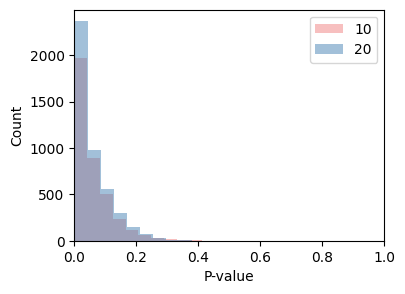

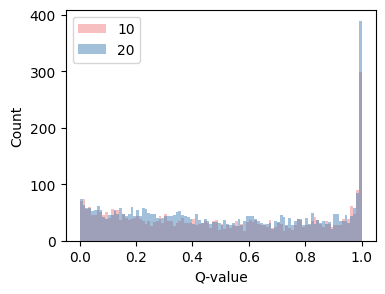

<Figure size 400x300 with 0 Axes>

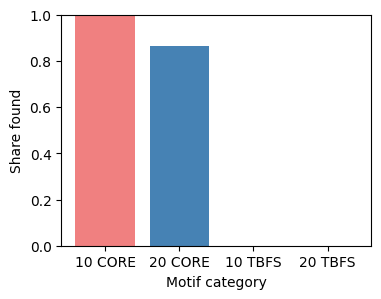

In [ ]:
process('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/core_only.meme', '/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomcore10_3.tsv', '/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomcore20_3.tsv')

N 10-queries (3772,) N 20-queries (4451,)
db size 653
byq10.shape, byq20.shape (1510, 10) (2334, 10)
Share of 10-queries with q<0.05 0.07237539766702014 Share of 20-queries with q<0.05 0.11660301055942485
Share of 10-targets with q<0.05 0.7274119448698315 Share of 20-targets with q<0.05 0.6983154670750383
missed in 10-queries 178 missed in 20-queries 197


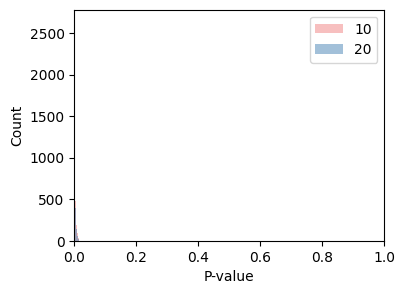

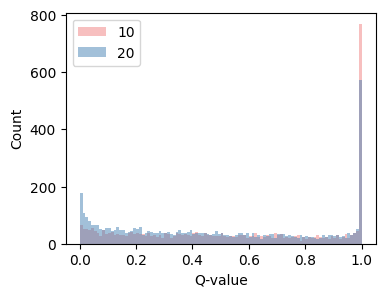

<Figure size 400x300 with 0 Axes>

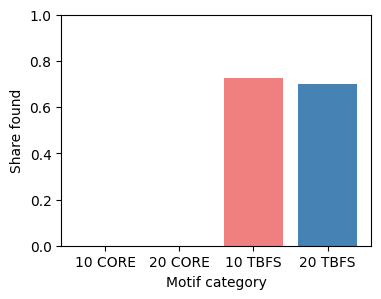

In [ ]:
process('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/20240423142310_JASPAR2022_combined_matrices_5170_meme_arabidopsis_only.txt', '/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomtfbs10_3.tsv', '/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/tomtomtfbs20_3.tsv')

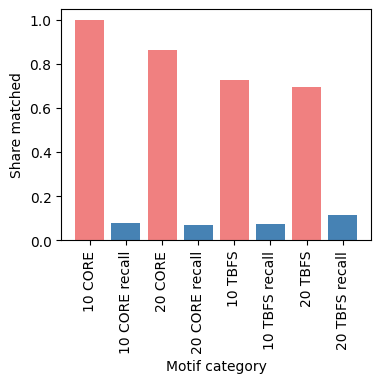

In [ ]:
fig = plt.figure(figsize=(4, 3))
plt.bar(['10 CORE','10 CORE recall', '20 CORE', '20 CORE recall', '10 TBFS', '10 TBFS recall', '20 TBFS', '20 TBFS recall'],
        [1.0, 0.07983302895903992,
          0.8666666666666667, 0.06803479812625474,
          0.7274119448698315 , 0.07237539766702014,
          0.6983154670750383, 0.11660301055942485],
        color=['steelblue', 'lightcoral', 'steelblue', 'lightcoral','steelblue', 'lightcoral', 'steelblue', 'lightcoral'][::-1])

plt.xlabel('Motif category')
plt.ylabel('Share matched')
plt.xticks(rotation=90)
# plt.ylim(0, 1)

plt.show()

### CORE AND TFBS statistics - relevance, position, kstest

In [ ]:
with open('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/res_annotatedloc_core10_3.pkl', 'rb') as f: annotated_core10 = pickle.load(f)
with open('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/res_annotatedloc_tfbs10_3.pkl', 'rb') as f: annotated_tfbs10 = pickle.load(f)
annotated_core10['Name:'] = annotated_core10['Name:'].fillna(annotated_core10['Class:'])
annotated_core10.sample(3)

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,...,Collection:,Taxon:,Species:,Data Type:,Validation:,Uniprot ID:,Source:,Comment:,relevance,shuffle_location
88,Athaliana_chr3_+_10547237_10547247,POL012.1,2,0.000583,0.008738,0.008738,10,ATAAATGCGA,GTATAAAAGGCGGGG,+,...,POLII,NaN,NaN,NaN,2329577,NaN,NaN,NaN,0.001273,219
141,Athaliana_chr3_+_344022_344032,POL012.1,1,0.001448,0.021717,0.021717,10,GATACAAAGC,GTATAAAAGGCGGGG,+,...,POLII,NaN,NaN,NaN,2329577,NaN,NaN,NaN,0.001996,810
166,Athaliana_chr3_-_3027663_3027673,POL012.1,3,0.003169,0.047530,0.047530,10,TAAATGCGCA,GTATAAAAGGCGGGG,+,...,POLII,NaN,NaN,NaN,2329577,NaN,NaN,NaN,0.005998,689


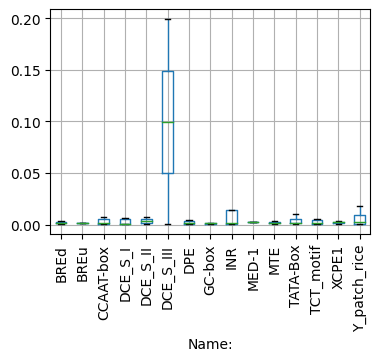

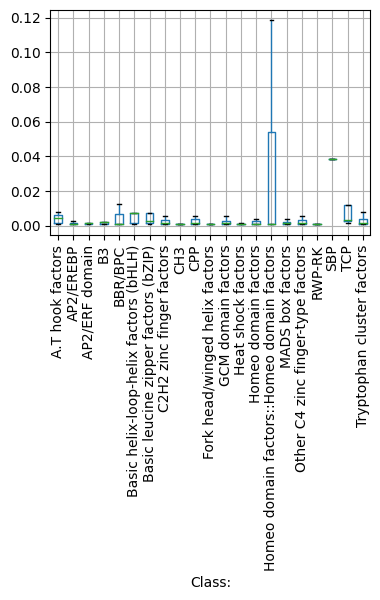

In [ ]:
# PO.. motifs have no class, but all in POLII collection
annotated_core10.boxplot(column='relevance', by='Name:',showfliers=False, figsize=(4, 3))
plt.title('')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

annotated_tfbs10.boxplot(column='relevance', by='Class:',showfliers=False, figsize=(4, 3))
plt.title('')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

In [ ]:
with open('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/res_annotatedloc_core50.pkl', 'rb') as f: annotated_core50 = pickle.load(f)
with open('/content/drive/MyDrive/Mag naloga/EPFL/repo_koda/MultiTSS/Data/res_annotatedloc_tfbs50.pkl', 'rb') as f: annotated_tfbs50 = pickle.load(f)
annotated_core50['Name:'] = annotated_core50['Name:'].fillna(annotated_core50['Class:'])
annotated_tfbs50['Name:'] = 'TBFS_all'


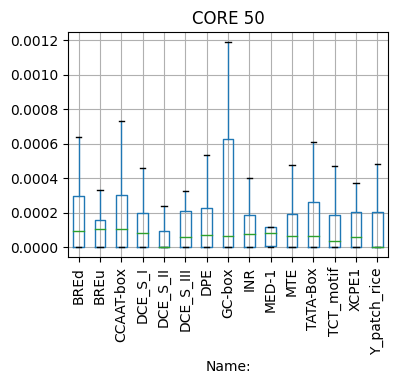

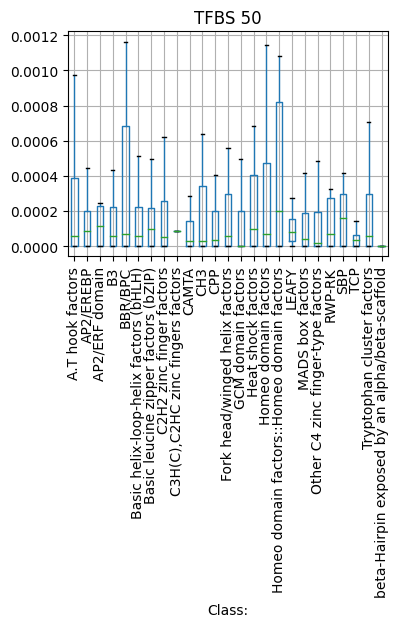

In [ ]:
annotated_core50.boxplot(column='relevance', by='Name:',showfliers=False, figsize=(4, 3))
plt.title('CORE 50')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()
annotated_tfbs50.boxplot(column='relevance', by='Class:',showfliers=False, figsize=(4, 3))
plt.title('TFBS 50')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

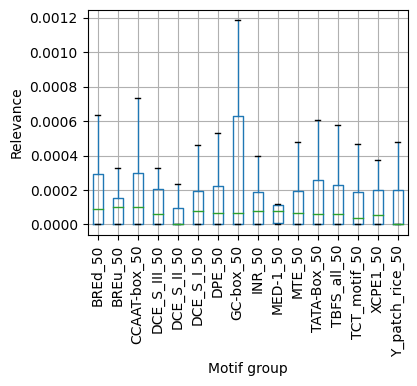

In [ ]:
allres = pd.concat([annotated_core10, annotated_tfbs10])
allres['Name:'] = allres['Name:'] + '_10'

all50 = pd.concat([annotated_core50, annotated_tfbs50])
all50['Name:'] = all50['Name:'] + '_50'

# pd.concat([allres, all50]).sort_values(by='Name:').boxplot(column='relevance', by='Name:',showfliers=False, figsize=(8, 3))
all50.sort_values(by='Name:').boxplot(column='relevance', by='Name:',showfliers=False, figsize=(4, 3))

plt.title('')
plt.suptitle('')
plt.xlabel('Motif group')
plt.ylabel('Relevance')
# plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

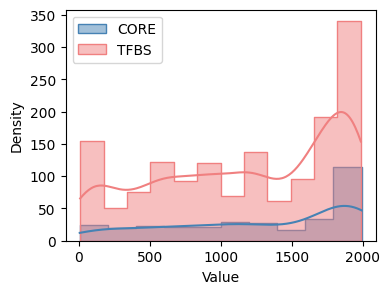

In [ ]:
import seaborn as sns
plt.figure(figsize=(4, 3))
column1 = annotated_core10['shuffle_location']
column2 = annotated_tfbs10['shuffle_location']
sns.histplot(column1, label='CORE', kde=True, color='steelblue', element='step')
sns.histplot(column2, label='TFBS', kde=True, color='lightcoral', element='step')

# Customize the plot
# plt.title('KDE Plot of Column from Two DataFrames')
plt.xlabel('Value')
plt.ylabel('Density')
# plt.xlim([0, 2000])
plt.legend(loc='upper left')

plt.show()

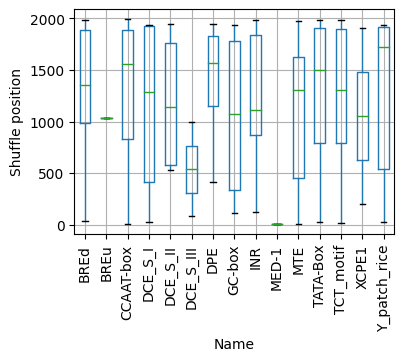

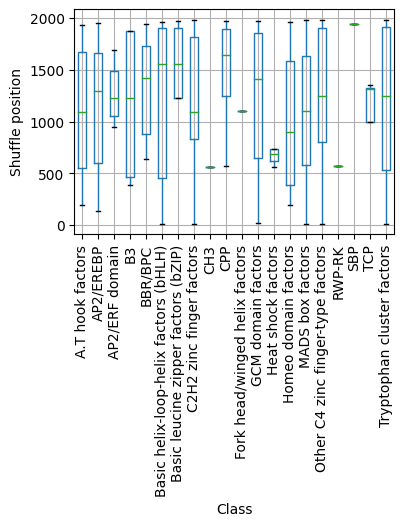

In [ ]:
# shuffle position relevance
annotated_core10.sort_values(by='Name:').boxplot(column='shuffle_location', by='Name:',showfliers=False, figsize=(4, 3))
plt.title('')
plt.suptitle('')
plt.xlabel('Name')
plt.ylabel('Shuffle position')
plt.xticks(rotation=90)
plt.show()

annotated_tfbs10 = annotated_tfbs10[~annotated_tfbs10['Class:'].isna()]
annotated_tfbs10['Class:'] = annotated_tfbs10['Class:'].replace('beta-Hairpin exposed by an alpha/beta-scaffold', 'beta-Hairpin')
annotated_tfbs10[annotated_tfbs10['Class:'] != 'Homeo domain factors::Homeo domain factors'].sort_values(by='Name:').boxplot(column='shuffle_location', by='Class:',showfliers=False, figsize=(4, 3))
plt.title('')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Shuffle position')
plt.xticks(rotation=90)
plt.show()

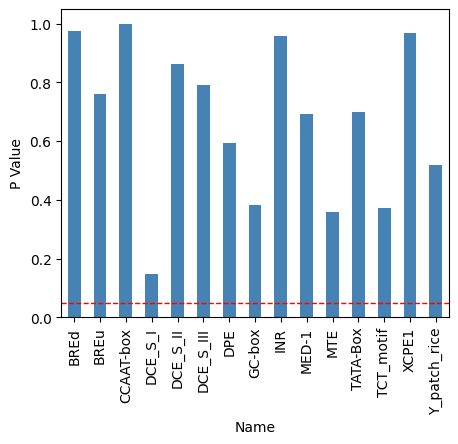

In [ ]:
from scipy.stats import ranksums, kstest
core_results = []

for name in annotated_core10['Name:'].unique():
  statistic, p_value = kstest(
    np.abs(annotated_core10[annotated_core10['Name:'] == name]['relevance'].values),
    np.abs(annotated_core10['relevance'].values),
  )
  core_results.append({'Name': name, 'ranksum p': p_value})

df_sorted = pd.DataFrame(core_results).sort_values(by='Name')
ax = df_sorted.plot(kind='bar', x='Name', y='ranksum p', legend=False, color='steelblue', figsize=(5, 4))
ax.set_xlabel('Name')
ax.set_ylabel('P Value')
ax.axhline(y=0.05, color='red', linestyle='--', linewidth=1)
ax.set_title('')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


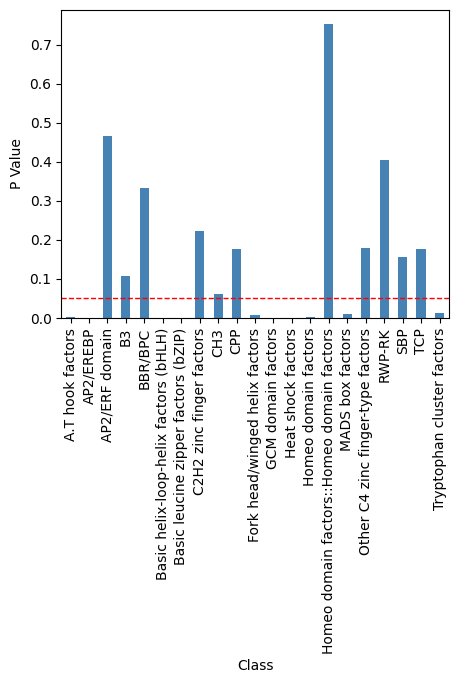

In [ ]:
from scipy.stats import ranksums, kstest
tfbs_results = []

for name in annotated_tfbs10['Class:'].unique():
  statistic, p_value = kstest(
    np.abs(annotated_tfbs10[annotated_tfbs10['Class:'] == name]['relevance'].values),
    np.abs(annotated_tfbs10['relevance'].values),
  )
  tfbs_results.append({'Class': name, 'ranksum p': p_value})

df_sorted = pd.DataFrame(tfbs_results).sort_values(by='Class')
ax = df_sorted.plot(kind='bar', x='Class', y='ranksum p', legend=False, color='steelblue', figsize=(5, 4))
ax.set_xlabel('Class')
ax.set_ylabel('P Value')
ax.axhline(y=0.05, color='red', linestyle='--', linewidth=1)
ax.set_title('')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()
